In [1]:
import pdal
import json
import os

for file in os.listdir(r"E:\ALS_DATA\NLS_20p_EVO"):
    savename = os.path.splitext(file)[0]
    pipeline_json = {
        "pipeline": [
            rf"E:\ALS_DATA\NLS_20p_EVO\{file}",
            {
                "type": "writers.gdal",
                "filename": rf"data\digital_surface_models_res2\20p\{savename}.tif",
                "resolution": 2.0,
                "output_type": "max",
                "gdaldriver": "GTiff"
            }
        ]
    }

    pipeline = pdal.Pipeline(json.dumps(pipeline_json))
    pipeline.execute()

    print(f"DTM generated via PDAL: {savename}.tif")



✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generated via PDAL: dtm.tif
✅ DTM generate

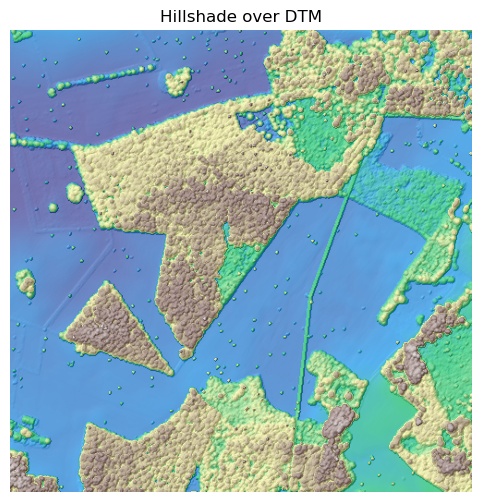

In [ ]:
from matplotlib.colors import LightSource
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# --- Load the DTM GeoTIFF ---
with rasterio.open("dtm.tif") as src:
    dtm = src.read(1)
    transform = src.transform

# Mask no-data values
dtm = np.ma.masked_where(np.isnan(dtm), dtm)

ls = LightSource(azdeg=315, altdeg=45)
hillshade = ls.hillshade(dtm, vert_exag=1, dx=1, dy=1)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(hillshade, cmap='gray', origin='upper')
ax.imshow(dtm, cmap='terrain', alpha=0.6, origin='upper')
ax.set_title("Digital surface model")
ax.axis('off')
plt.show()

